In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../src/")
from fLe_timecrystal import fle
import fBm_stats as fbs
plt.style.use("plot_style.mplstyle")

In [2]:
T = 15
h = 0.05
v0 = 1
M = 1
eta_1 = 1
eta_2 = 1
T1 = 1
T2 = 1


# HIGH ORDERS

In [3]:
alpha = 0.7
eq1 = fle(alpha, linear = True)
eq1.params(T = T, h = h,
          v0 = v0, M = M,
          eta_1 = eta_1, eta_2 = eta_2,
          T1 = T1, T2 = T2)
eq1.make_B_H()
eq1.solve()
eq1.relaxation_linear()
eq1.corr_v_linear()

In [4]:
eq2 = fle(alpha, linear = False)
eq2.params(T = T, h = h,
          v0 = v0, M = M,
          eta_1 = eta_1, eta_2 = eta_2,
          T1 = T1, T2 = T2)
eq2.make_B_H()
eq2.solve()
eq2.relaxation_non_linear()
eq2.corr_v_non_linear()

In [5]:
brownian = fle(1, linear = True)
brownian.params(T = T, h = h,
          v0 = v0, M = M,
          eta_1 = eta_1, eta_2 = eta_2,
          T1 = T1, T2 = T2)
brownian.make_B_H()
def relaxation_brownian(eq):
    return(eq.M/eq.zeta*(1-np.exp(-eq.zeta/eq.M*eq.t)))

def corr_v_brownian(eq):
    return(np.exp(-eq.zeta/eq.M*eq.t))

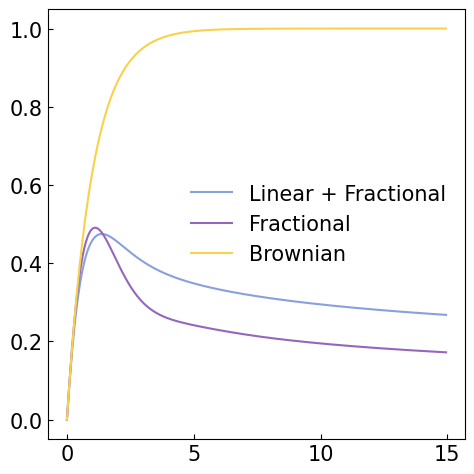

In [6]:
fig, ax = plt.subplots()
ax.plot(eq1.t, eq1.G, label = "Linear + Fractional")
ax.plot(eq2.t, eq2.G, label = "Fractional")
ax.plot(brownian.t, relaxation_brownian(brownian), label = "Brownian")

ax.legend()


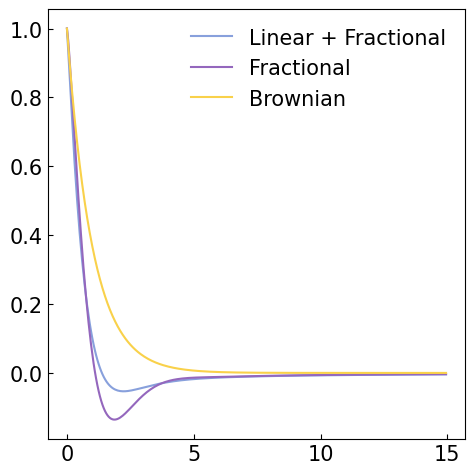

In [7]:
fig, ax = plt.subplots()
ax.plot(eq1.t, eq1.corr_v, label = "Linear + Fractional")
ax.plot(eq2.t, eq2.corr_v, label = "Fractional")
ax.plot(brownian.t, corr_v_brownian(brownian), label = "Brownian")

ax.legend()

# SMALL ORDERS

In [8]:
alpha = 0.05
eq1 = fle(alpha, linear = True)
eq1.params(T = T, h = h,
          v0 = v0, M = M,
          eta_1 = eta_1, eta_2 = eta_2,
          T1 = T1, T2 = T2)
eq1.make_B_H()
eq1.solve()
eq1.relaxation_linear()
eq1.corr_v_linear()

In [9]:
eq2 = fle(alpha, linear = False)
eq2.params(T = T, h = h,
          v0 = v0, M = M,
          eta_1 = eta_1, eta_2 = eta_2,
          T1 = T1, T2 = T2)
eq2.make_B_H()
eq2.solve()
eq2.relaxation_non_linear()
eq2.corr_v_non_linear()

In [10]:
brownian = fle(1, linear = True)
brownian.params(T = T, h = h,
          v0 = v0, M = M,
          eta_1 = eta_1, eta_2 = eta_2,
          T1 = T1, T2 = T2)
brownian.make_B_H()
def relaxation_brownian(eq):
    return(eq.M/eq.zeta*(1-np.exp(-eq.zeta/eq.M*eq.t)))

def corr_v_brownian(eq):
    return(np.exp(-eq.zeta/eq.M*eq.t))

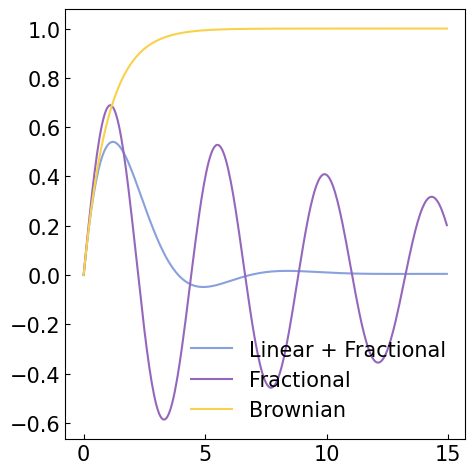

In [11]:
fig, ax = plt.subplots()
ax.plot(eq1.t, eq1.G, label = "Linear + Fractional")
ax.plot(eq2.t, eq2.G, label = "Fractional")
ax.plot(brownian.t, relaxation_brownian(brownian), label = "Brownian")

ax.legend()


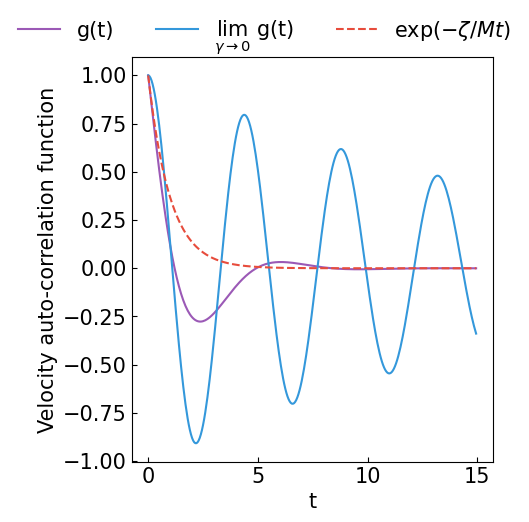

In [39]:
fig, ax = plt.subplots()
ax.plot(eq1.t, eq1.corr_v, label = "g(t)", color = "#9b59b6")
ax.plot(eq2.t, eq2.corr_v, label = r"$\lim_{\gamma \rightarrow 0}}$ g(t)", color = "#3498db")
ax.plot(brownian.t, corr_v_brownian(brownian), label = r"$\exp(-\zeta/Mt)$", color = "#e74c3c", ls = "--")
ax.set_xlabel("t")
ax.set_ylabel("Velocity auto-correlation function")
handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, bbox_to_anchor = (1.03, 1.07), ncol = 3)
fig.tight_layout()
fig.savefig("../outs/vacf.png", dpi = 100)